In [1]:
import pandas as pd

# Load the data
file_path = '/Users/Administrator/Downloads/Cleaned_Data.csv'
data = pd.read_csv(file_path)

In [3]:
text_data = ' '.join(data['text'].dropna()).lower()

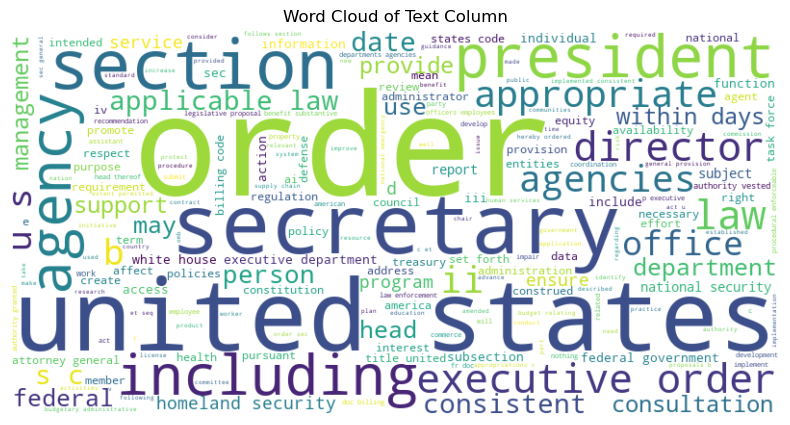

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Text Column')
plt.show()


count    362.000000
mean       0.032325
std        0.057319
min       -0.216220
25%       -0.005916
50%        0.032695
75%        0.069862
max        0.230434
Name: sentiment, dtype: float64


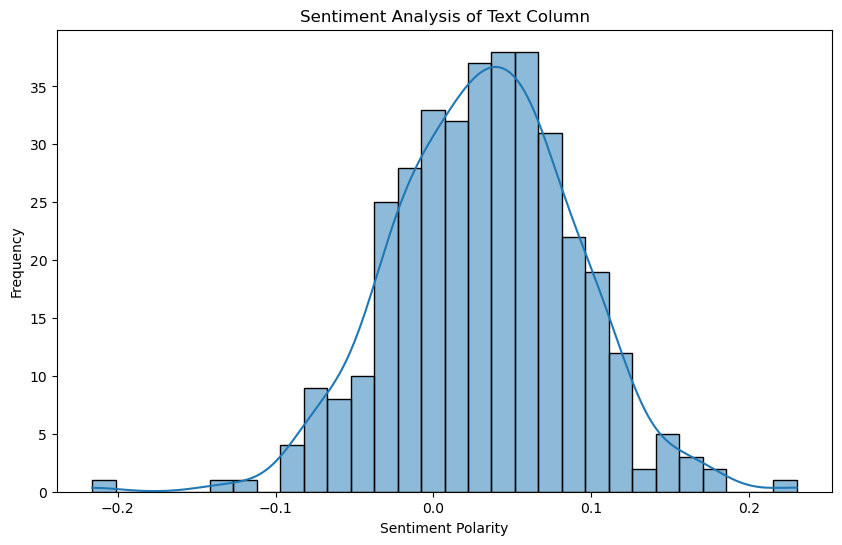

In [9]:
from textblob import TextBlob
import seaborn as sns

# Calculate sentiment polarity
data['sentiment'] = data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(data['sentiment'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'], bins=30, kde=True)
plt.title('Sentiment Analysis of Text Column')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

The histogram shows the frequency distribution of sentiment scores, revealing how many entries fall within certain sentiment ranges.
The distribution appears to be approximately normal (bell-shaped), with a slight right skew towards positive values. This suggests that while there are some negative sentiments, the majority of entries are on the positive side.

In [11]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Prepare text data for LDA
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(data['text'])

# Set up and fit LDA
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(dtm)

# Function to display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic %d: " % topic_idx
        message += " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        print(message)

# Display the topics
display_topics(lda, vectorizer.get_feature_names_out(), 10)

Topic 0: secretary security director national ai appropriate information federal including days
Topic 1: agency federal including services consistent secretary health policy director general
Topic 2: national security climate agency secretary environmental policy data appropriate energy
Topic 3: secretary property state pursuant foreign national security including act government
Topic 4: federal secretary health council including 19 policy covid public agency


Topic Interpretations
Topic 0:

Keywords: secretary, security, director, national, AI, appropriate, information, federal, including, days

Interpretation: This topic seems to focus on the intersection of national security and artificial intelligence (AI). It likely discusses the role of a secretary or director in a federal agency responsible for overseeing AI-related security measures, the appropriate handling of information, and possibly the timeline for implementing these policies. It could be related to government initiatives or regulations concerning AI technology and national security.

Topic 1:

Keywords: agency, federal, including, services, consistent, secretary, health, policy, director, general

Interpretation: This topic likely revolves around federal health services and policies. It indicates discussions on the role of a federal agency, perhaps the Department of Health and Human Services, and the responsibilities of the secretary and director in implementing consistent health policies. The emphasis may be on the administration of health services or public health initiatives at the federal level.

Topic 2:

Keywords: national, security, climate, agency, secretary, environmental, policy, data, appropriate, energy

Interpretation: This topic appears to address national security in relation to environmental policies and climate change. It suggests a focus on how federal agencies, led by a secretary, are responding to environmental challenges, possibly emphasizing data-driven policies concerning energy and climate. The inclusion of "national security" implies concerns about how environmental issues might impact national safety and resources.

Topic 3:

Keywords: secretary, property, state, pursuant, foreign, national, security, including, act, government

Interpretation: This topic likely pertains to government policies regarding foreign relations and property rights as they relate to national security. The terms suggest legal frameworks or acts that guide the management of properties (potentially involving foreign ownership) in the context of national security. This may involve discussions about how state and federal governments handle foreign investments or property acquisitions that could affect national interests.

Topic 4:

Keywords: federal, secretary, health, council, including, 19, policy, covid, public, agency

Interpretation: This topic seems to be focused on public health policy, especially in relation to COVID-19. It indicates a discussion involving federal health agencies, secretaries, and councils, potentially outlining policies and actions taken during the pandemic. The use of "19" directly refers to COVID-19, highlighting its impact on public health strategies and government response efforts.

General Observations
Common Themes: Several topics revolve around federal agencies and the roles of secretaries and directors, suggesting a governmental context with emphasis on policy-making and security.
Interconnectivity: Topics related to health and security may overlap, particularly in areas like public health emergencies (e.g., COVID-19) and national security considerations linked to environmental policies.
Focus on Data and AI: The inclusion of AI and data in topics indicates an evolving landscape where technology plays a crucial role in shaping policies, especially in security and health.